# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

# Is the distribution of body temperatures normal?
Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [8]:
import numpy as np
mean_temp = np.mean(df.temperature)
std_temp = np.std(df.temperature)
len_temp = len(df.temperature)

In [9]:
from scipy.stats import norm
data_norm = norm.rvs(size=len_temp,loc=mean_temp,scale=std_temp)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal Distribution')]

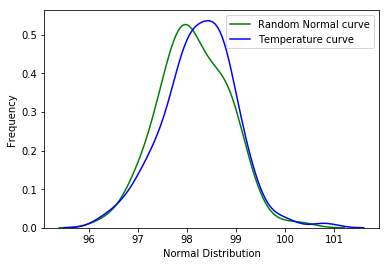

In [23]:
import seaborn as sns
ax = sns.distplot(data_norm,kde=True,hist=False, bins=100,color='green',label = 'Random Normal curve')
ax = sns.distplot(df['temperature'],kde=True,hist=False,bins=100,color='blue',label='Temperature curve')
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

In [24]:
def ECDF(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1,n+1)/n
    return x,y

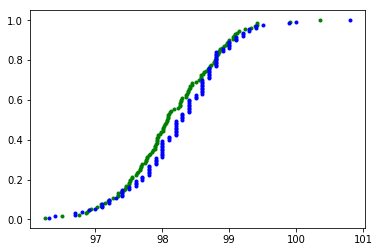

In [26]:
import matplotlib.pyplot as plt
rand_x, rand_y = ECDF(data_norm)
temp_x , temp_y = ECDF(df['temperature'])
plt.plot(rand_x,rand_y,linestyle='none',marker='.',color='green')
plt.plot(temp_x,temp_y,linestyle='none',marker='.',color='blue')

In [91]:
import scipy.stats as stats
alpha = 0.05

stat, p = stats.shapiro(df["temperature"])

if p > alpha:
    print("Temperature Curve is normally distributed")
else:
    print("Temperature Curve is not normally distributed")

Temperature Curve is normally distributed


# Is the sample size large? Are the observations independent?
Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.

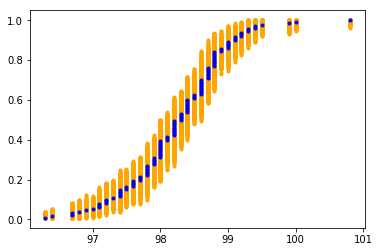

In [32]:
for i in range(1000):
    bs = np.random.choice(df.temperature,size=len(df.temperature))
    
    x,y = ECDF(bs)
    plt.plot(x,y,marker='.',linestyle='none',color='orange')
    
temp_x , temp_y = ECDF(df['temperature'])
plt.plot(temp_x,temp_y,linestyle='none',marker='.',color='blue')

In [33]:
print(len(df.temperature))

130


According to the 10% rule, sample size less than or equal to 10% of the population size is considered to be independent. The sample size is 130. The human population around the 1900's have to be less than 1,300 for the observations to be considered dependent. Therefore, the sample entries can be said to be independent of each other.

# Is the true population mean really 98.6 degrees F?
First, try a bootstrap hypothesis test.
Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
In this situation, is it appropriate to use the  𝑡  or  𝑧  statistic?
Now try using the other test. How is the result be different? Why?

Null hypothesis : Temperature Mean is 98.6F

Alternate hypothesis : Temperature Mean is not 98.6F

We will be performing one sample Bootstrap test as we are comparing our dataset with a set mean value.

In [38]:
alpha = 0.05
hyp_mean = 98.6

In [34]:
#defining test statistic:

def test_statistic(data,hyp_mean=98.6):
    x = np.mean(data) - hyp_mean
    return x

In [35]:
#defining function to create bootstrap samples:

def bootstrap_samples(data,func):
    return func(np.random.choice(data,size=len(data)))

In [36]:
#defining function to create bootstrap replicates:

def bootstrap_replicates(data,func,size=1):
    
    bs_replicate = np.empty(size)
    
    for i in range(size):
        bs_replicate[i] = bootstrap_samples(data,func)
        
    return bs_replicate

In [44]:
#shift the mean:

shifted_temp = df['temperature'] - np.mean(df['temperature']) + hyp_mean

print("The shifted mean is : %.1fF" % np.mean(shifted_temp))

The shifted mean is : 98.6F


In [46]:
obs_mean = test_statistic(df.temperature)
print(obs_mean)

-0.35076923076921673


In [48]:
bs_replicates = bootstrap_replicates(shifted_temp,test_statistic,size=10000)

In [63]:
p = np.sum(bs_replicates <= obs_mean)/10000

if p <= alpha:
    print("We can reject null hypothesis that the temperature mean is 98.6F with p-value as " + str(p))
else:
    print("We cannot reject null hypothesis that the temperature mean is 98.6F with p-value as " + str(p))

We can reject null hypothesis that the temperature mean is 98.6F with p-value as 0.0


Since the sample size is greater than 30 (n > 30), it is appropriate to use z-test.

In [64]:
from statsmodels.stats import weightstats as weight
z,pz = weight.ztest(df.temperature,value=98.6)

if pz <= alpha:
     print("We can reject null hypothesis that the temperature mean is 98.6F with p-value as " + str(pz))
else:
    print("We cannot reject null hypothesis that the temperature mean is 98.6F with p-value as " + str(pz))

We can reject null hypothesis that the temperature mean is 98.6F with p-value as 4.9021570141012155e-08


Let us try using t-test now.

In [65]:
t,pt = stats.ttest_1samp(df.temperature,98.6)

if pt <= alpha:
     print("We can reject null hypothesis that the temperature mean is 98.6F with p-value as " + str(pt))
else:
    print("We cannot reject null hypothesis that the temperature mean is 98.6F with p-value as " + str(pt))

We can reject null hypothesis that the temperature mean is 98.6F with p-value as 2.4106320415561276e-07


We get the same conclusion in either approach. Therefore, the temperature mean is NOT 98.6F

# Draw a small sample of size 10 from the data and repeat both frequentist tests.
Which one is the correct one to use?
What do you notice? What does this tell you about the difference in application of the  𝑡  and  𝑧  statistic?

In [55]:
sample = df.sample(n=10,replace=False)

Since the sample size is less than 30 ( n < 30), t-test is preferable.

In [67]:
t, pt1 = stats.ttest_1samp(sample.temperature,98.6)

if pt1 <= alpha:
     print("We can reject null hypothesis  that the temperature mean is 98.6F with p-value as " + str(pt1))
else:
    print("We cannot reject null hypothesis that the temperature mean is 98.6F with p-value as " + str(pt1))

We cannot reject null hypothesis that the temperature mean is 98.6F with p-value as 0.1296548348927496


Let us try z-test now.

In [68]:
z1, pz1 = weight.ztest(sample.temperature,value=98.6)

if pz1 <= alpha:
     print("We can reject null hypothesis that the temperature mean is 98.6F with p-value as " + str(pz1))
else:
    print("We cannot reject null hypothesis that the temperature mean is 98.6F with p-value as " + str(pz1))


We cannot reject null hypothesis which means that the temperature mean is 98.6F with p-value as 0.09530915845284846


Both the tests confirms that the true population mean is 98.6F for a sample size of 10. I think this is due to the fact that there is a drastic decrease in the sample size.

# At what temperature should we consider someone's temperature to be "abnormal"?
As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [69]:
bs_repl = bootstrap_replicates(df.temperature,np.mean,size=10000)

normal_temp = np.percentile(bs_repl,[2.5,97.5])
print(normal_temp)

[98.12769231 98.37463462]


Since the 95% confidence interval is between 98.12538462 and 98.37538462. Any temperature below or above this range can be considered as abnormal.

In [70]:
#margin of error:
#margin of error = z-value*(std)/sqrt(n) ;
#z-value is used since the sample size > 30 and z-value is 1.96 if you want to be 95% confident.


mer = 1.96* np.std(df.temperature)/np.sqrt(len(df.temperature))

print(mer)

0.125550964802579


# Is there a significant difference between males and females in normal temperature?
What testing approach did you use and why?
Write a story with your conclusion in the context of the original problem.

In [72]:
df_male = df[df.gender == 'M']
df_female = df[df.gender == 'F']

We will perform bootstrap hypothesis to check if our null hypothesis is true.

Null hypothesis : There is no significant difference between both male and female in normal temperature. 

Alternate hypothesis : There is significant difference between both male and female in normal temperature.

In [92]:
empirical_diff = np.mean(df_female.temperature) - np.mean(df_male.temperature)
print(empirical_diff)

0.289230769230727


In [89]:
shifted_male = df_male.temperature - np.mean(df_male.temperature) + np.mean(df.temperature)
shifted_female = df_female.temperature - np.mean(df_female.temperature) + np.mean(df.temperature)

bs_replicates_male = bootstrap_replicates(shifted_male,np.mean,10000)
bs_replicates_female = bootstrap_replicates(shifted_female,np.mean,10000)

bs_replicates_gender = bs_replicates_female - bs_replicates_male

pgender = np.sum(bs_replicates_gender >= empirical_diff)/len(bs_replicates_gender)

if pgender <= alpha:
     print("We can reject null hypothesis with p-value as " + str(pgender))
else:
    print("We cannot reject null hypothesis with p-value as " + str(pgender))


We can reject null hypothesis with p-value as 0.0131


The analysis concludes that there is significant difference between male and female normal body temperatures.